In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Read dataset file
df = pd.read_csv('BTC.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df

,Price
0,13444.9
1,14754.1
2,15156.6
3,15180.1
4,16954.8
...,...
1938,27591.4
1939,27509.3
1940,28298.8
1941,28424.6


In [3]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
#Holt-Winters Exponential Smoothing model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

model = ExponentialSmoothing(y_train, seasonal_periods=365, trend='add', seasonal='add',initialization_method="estimated")
fit = model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [5]:
# make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = fit.forecast(len(y_test))

# make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val = fit.forecast(len(y_val))

In [6]:
# Forecast the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = fit.forecast(len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted Bitcoin closing prices for the next 30 days:')
print(y_next_30_days)

Predicted Bitcoin closing prices for the next 30 days:
[40547.58590387 39870.63912399 39737.24635831 39540.6984943
 39688.76254777 39650.03311153 39530.42355999 39639.2484893
 39610.33156722 39587.28567165 39473.33460414 39447.05394867
 39438.83951364 39269.37688186 39409.25707892 39405.35771892
 39561.89340014 39517.53167634 39155.8357838  39176.45744309
 39156.37206224 39171.21011269 39241.56127213 39137.73647723
 39140.75321961 38998.52870388 38948.15864972 39088.51401591
 39064.00904032 38939.60873468]


In [7]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 15757.06054793809
Testing RMSE: 12302.026290602349
Validation MAPE: 74.95534234730196
Testing MAPE: 32.253879117240345
Validation MAE: 14437.56814862973
Testing MAE: 10792.27527889164


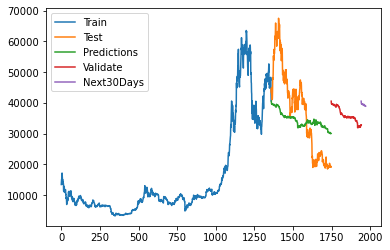

In [8]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Days'])
plt.show()